# Reasonable shortcut distributions

In [1]:
from kleinberg_grid_simulator import compute_edt, get_bounds, parallelize
from matplotlib import pyplot as plt

As observed by Kleinberg, for any given $n$, $r=2$ is not the optimal value for having the shortest routes. Let's have a look with a grid of size 20,000.

In [2]:
n = 20000
res = parallelize([{'r': r/10, 'n': n} for r in range(0, 31)])

100%|█████████████████████████████████████████████████████████████████████████████████| 31/31 [00:00<00:00, 2409.80it/s]


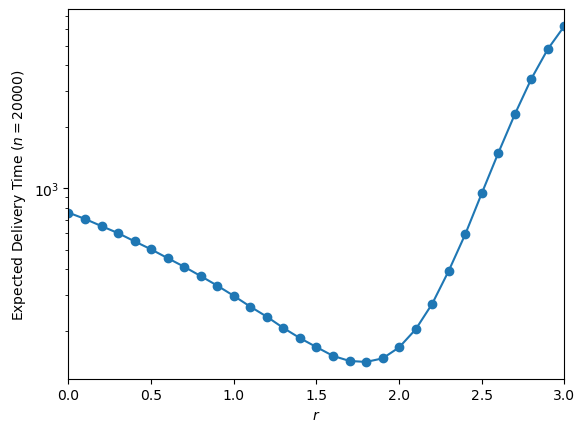

In [3]:
r = [re.r for re in res]
edt = [re.edt for re in res]
plt.semilogy(r, edt, '-', marker='o')
plt.ylabel(f'Expected Delivery Time ($n={n}$)')
plt.xlabel('$r$')
plt.xlim([0, 3])
plt.show()

The simulator can give you, for a given value of $n$, the key ranges:
- What are the values of $r$ faster than $r=2$?
- What is the optimal value of $r$?
- What are the values of $r$ at most twice slower than $r=2$?

In [4]:
res = parallelize([{'n': 2**i} for i in range(7, 50)], function=get_bounds)

100%|████████████████████████████████████████████████████████████████████████████████| 43/43 [00:00<00:00, 16614.93it/s]


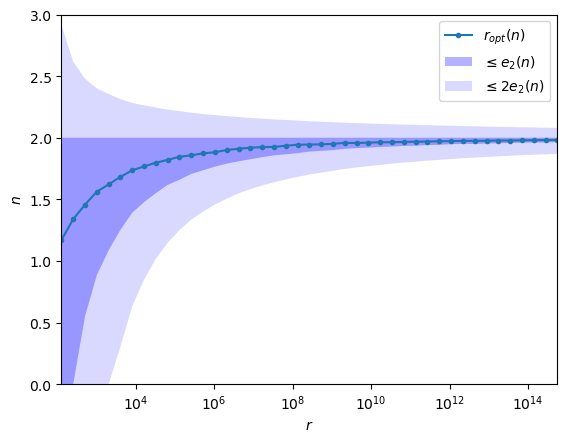

In [6]:
n = [re['n'] for re in res]
opt = [re['r_opt'] for re in res]
rm = [re['r-'] for re in res]
r2p = [re['r2+'] for re in res]
r2m = [re['r2-'] for re in res]
plt.semilogx(n, opt, marker='o', markersize=3, label='$r_{opt}(n)$')
plt.fill_between(n, rm, [2 for _ in n], facecolor='blue', alpha=0.3, label='$\leq e_2(n)$')
plt.fill_between(n, r2m, r2p, facecolor='blue', alpha=0.15, label='$\leq 2e_2(n)$')
plt.legend()
plt.xlim([n[0], n[-1]])
plt.ylim([0, 3])
plt.xlabel('$r$')
plt.ylabel('$n$')
plt.show()